# 🧠 Predicción de Accidente Cerebrovascular (ACV)
## Actividad Integradora - Comparación de Modelos Supervisados

**Dataset:** Stroke Prediction Dataset (Kaggle)  
**Modelos:** KNN, Perceptrón, MLP  
**Equipo:** [Nombres de los integrantes]

---

## 1. Introducción y Descripción del Problema

### 1.1 Planteamiento del Problema

El **accidente cerebrovascular (ACV)** es una de las principales causas de muerte y discapacidad a nivel mundial. Según la Organización Mundial de la Salud, aproximadamente 15 millones de personas sufren un ACV anualmente, y de ellos, 5 millones mueren y otros 5 millones quedan con discapacidad permanente. **Predecir el riesgo de ACV** es crucial para implementar intervenciones médicas preventivas. Este proyecto busca desarrollar modelos de clasificación supervisada que, utilizando variables clínicas como edad, hipertensión, nivel de glucosa e IMC, puedan identificar pacientes con alto riesgo de sufrir un ACV, permitiendo a los profesionales de la salud tomar acciones preventivas oportunas.

### 1.2 Descripción del Dataset

| Característica | Valor |
|----------------|-------|
| **Nombre** | Stroke Prediction Dataset |
| **Fuente** | Kaggle |
| **Registros** | 5,110 |
| **Variables** | 12 (11 predictoras + 1 objetivo) |
| **Variable objetivo** | `stroke` (0 = No ACV, 1 = ACV) |

### 1.3 Variables del Dataset

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `id` | Numérica | Identificador único del paciente |
| `gender` | Categórica | Género del paciente (Male, Female, Other) |
| `age` | Numérica | Edad del paciente en años |
| `hypertension` | Binaria | 0 = sin hipertensión, 1 = con hipertensión |
| `heart_disease` | Binaria | 0 = sin enfermedad cardíaca, 1 = con enfermedad |
| `ever_married` | Categórica | Estado civil (Yes/No) |
| `work_type` | Categórica | Tipo de empleo (Private, Self-employed, Govt_job, children, Never_worked) |
| `Residence_type` | Categórica | Tipo de residencia (Urban/Rural) |
| `avg_glucose_level` | Numérica | Nivel promedio de glucosa en sangre (mg/dL) |
| `bmi` | Numérica | Índice de masa corporal |
| `smoking_status` | Categórica | Estado de fumador (formerly smoked, never smoked, smokes, Unknown) |
| `stroke` | **Objetivo** | **1 = tuvo ACV, 0 = no tuvo ACV** |

---
## 2. Librerías e Instalación

In [23]:
# Instalación de librerías necesarias
%pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Downgrade scikit-learn to a compatible version for imbalanced-learn
%pip install scikit-learn==1.4.2 --force-reinstall -q
import sklearn
print("scikit-learn version after downgrade:", sklearn.__version__)

Note: you may need to restart the kernel to use updated packages.
scikit-learn version after downgrade: 1.4.2


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn - Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Sklearn - Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Sklearn - Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# SMOTE para balanceo de clases
from imblearn.over_sampling import SMOTE

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


---
## 3. EDA y Preprocesamiento

### 3.1 Carga y Exploración Inicial

In [26]:
# Cargar el dataset
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print("="*60)
print("INFORMACIÓN BÁSICA DEL DATASET")
print("="*60)
print(f"\nDimensiones: {df.shape[0]} registros x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")

INFORMACIÓN BÁSICA DEL DATASET

Dimensiones: 5110 registros x 12 columnas

Columnas: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [27]:
# Primeras filas (head)
print("PRIMERAS 5 FILAS")
df.head()

PRIMERAS 5 FILAS


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# Información de tipos de datos (info)
print("TIPOS DE DATOS")
df.info()

TIPOS DE DATOS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [29]:
# Estadísticas descriptivas (describe)
print("ESTADÍSTICAS DESCRIPTIVAS")
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3.2 Análisis de Valores Faltantes

In [30]:
print("="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)

# BMI tiene valores 'N/A' como string
if df['bmi'].dtype == 'object':
    missing_bmi = (df['bmi'] == 'N/A').sum()
else:
    missing_bmi = df['bmi'].isna().sum()

print(f"\nValores faltantes en BMI: {missing_bmi} ({(missing_bmi/len(df))*100:.2f}%)")

print("\nValores nulos por columna:")
print(df.isnull().sum())

ANÁLISIS DE VALORES FALTANTES

Valores faltantes en BMI: 201 (3.93%)

Valores nulos por columna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### 3.3 Distribución de la Variable Objetivo

In [31]:
print("="*60)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (STROKE)")
print("="*60)

stroke_counts = df['stroke'].value_counts()
stroke_pct = df['stroke'].value_counts(normalize=True) * 100

print(f"\nClase 0 (No ACV): {stroke_counts[0]} registros ({stroke_pct[0]:.2f}%)")
print(f"Clase 1 (ACV):    {stroke_counts[1]} registros ({stroke_pct[1]:.2f}%)")
print(f"\n⚠️ DATASET ALTAMENTE DESBALANCEADO - Ratio {stroke_counts[0]/stroke_counts[1]:.0f}:1")

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (STROKE)

Clase 0 (No ACV): 4861 registros (95.13%)
Clase 1 (ACV):    249 registros (4.87%)

⚠️ DATASET ALTAMENTE DESBALANCEADO - Ratio 20:1


### 3.4 Visualizaciones EDA

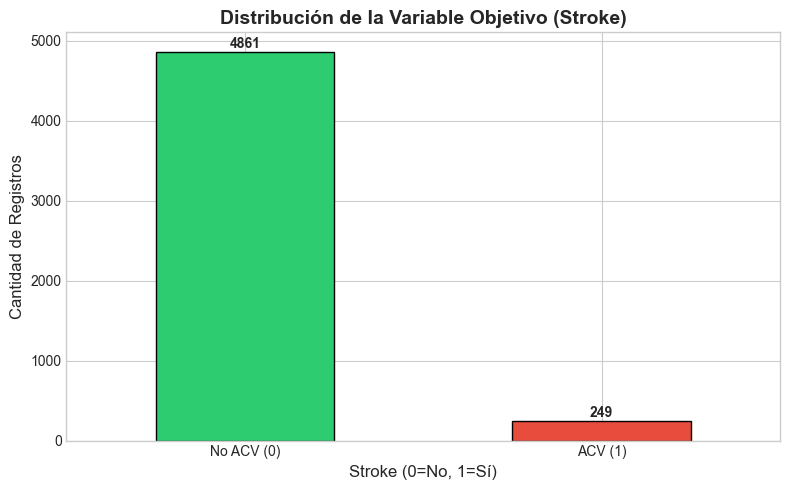

In [32]:
# Gráfico de barras - Distribución de stroke
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
df['stroke'].value_counts().plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.set_title('Distribución de la Variable Objetivo (Stroke)', fontsize=14, fontweight='bold')
ax.set_xlabel('Stroke (0=No, 1=Sí)', fontsize=12)
ax.set_ylabel('Cantidad de Registros', fontsize=12)
ax.set_xticklabels(['No ACV (0)', 'ACV (1)'], rotation=0)

for i, v in enumerate(df['stroke'].value_counts()):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

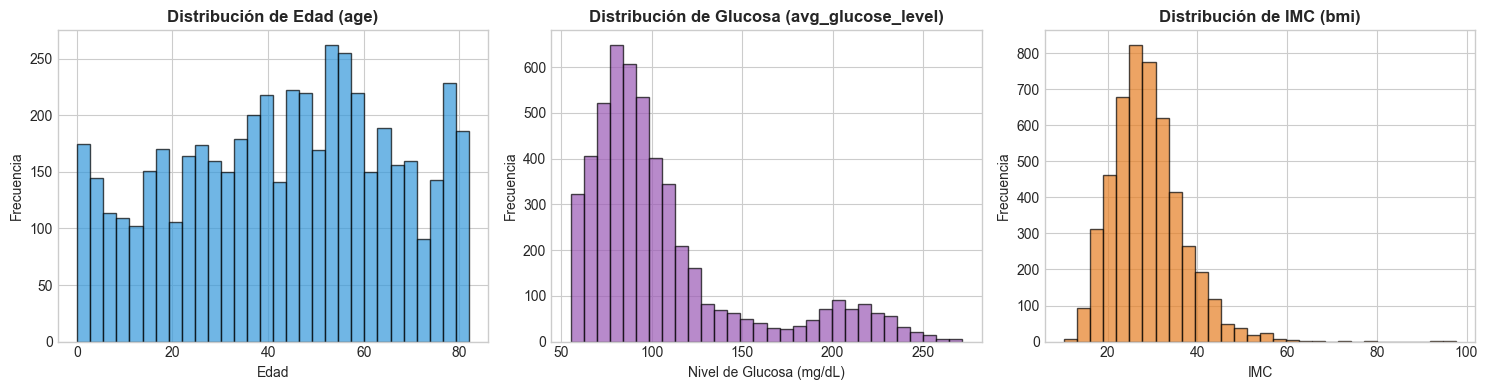

In [33]:
# Histogramas de variables numéricas: age, avg_glucose_level, bmi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df_temp = df.copy()
df_temp['bmi'] = pd.to_numeric(df_temp['bmi'], errors='coerce')

# Age
axes[0].hist(df_temp['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Edad (age)', fontweight='bold')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Glucose
axes[1].hist(df_temp['avg_glucose_level'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Glucosa (avg_glucose_level)', fontweight='bold')
axes[1].set_xlabel('Nivel de Glucosa (mg/dL)')
axes[1].set_ylabel('Frecuencia')

# BMI
axes[2].hist(df_temp['bmi'].dropna(), bins=30, color='#e67e22', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribución de IMC (bmi)', fontweight='bold')
axes[2].set_xlabel('IMC')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

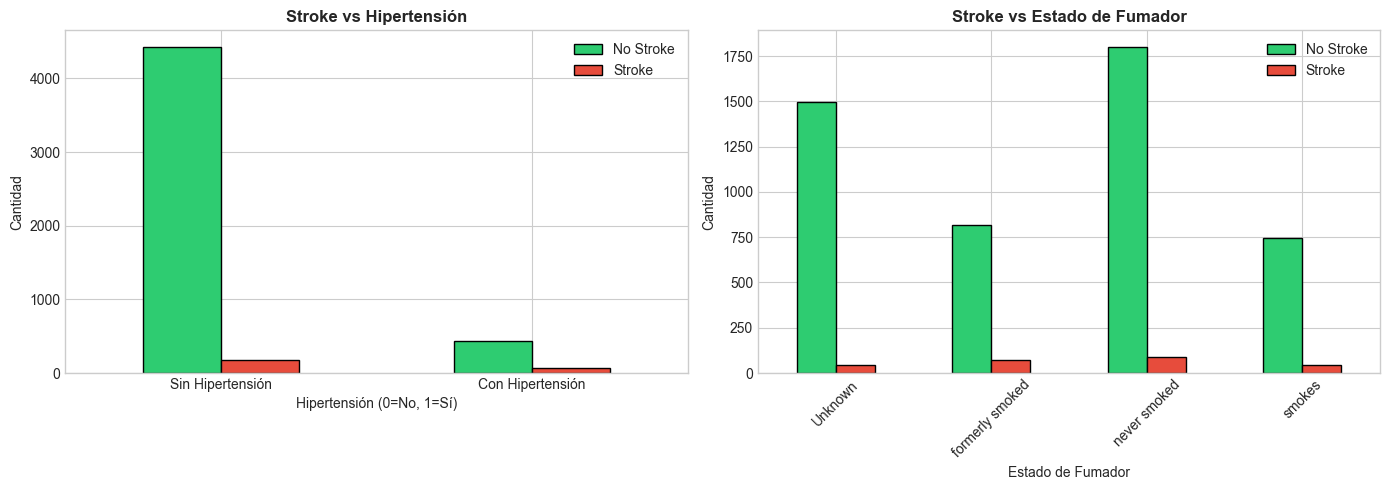

In [34]:
# Relación stroke vs hypertension y stroke vs smoking_status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stroke vs Hypertension
pd.crosstab(df['hypertension'], df['stroke']).plot(kind='bar', ax=axes[0], 
                                                    color=['#2ecc71', '#e74c3c'],
                                                    edgecolor='black')
axes[0].set_title('Stroke vs Hipertensión', fontweight='bold')
axes[0].set_xlabel('Hipertensión (0=No, 1=Sí)')
axes[0].set_ylabel('Cantidad')
axes[0].legend(['No Stroke', 'Stroke'])
axes[0].set_xticklabels(['Sin Hipertensión', 'Con Hipertensión'], rotation=0)

# Stroke vs Smoking Status
pd.crosstab(df['smoking_status'], df['stroke']).plot(kind='bar', ax=axes[1],
                                                      color=['#2ecc71', '#e74c3c'],
                                                      edgecolor='black')
axes[1].set_title('Stroke vs Estado de Fumador', fontweight='bold')
axes[1].set_xlabel('Estado de Fumador')
axes[1].set_ylabel('Cantidad')
axes[1].legend(['No Stroke', 'Stroke'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.5 Preprocesamiento de Datos

> **📝 Nota:** La documentación detallada de cada paso se encuentra en `docs/preprocesamiento.md`

In [35]:
# PASO 1: Eliminar columna ID
df_processed = df.copy()
df_processed = df_processed.drop('id', axis=1)
print("✓ PASO 1: Columna 'id' eliminada (no aporta información predictiva)")

✓ PASO 1: Columna 'id' eliminada (no aporta información predictiva)


In [36]:
# PASO 2: Imputar valores faltantes en BMI
df_processed['bmi'] = df_processed['bmi'].replace('N/A', np.nan)
df_processed['bmi'] = pd.to_numeric(df_processed['bmi'])

bmi_median = df_processed['bmi'].median()
df_processed['bmi'] = df_processed['bmi'].fillna(bmi_median)

print(f"✓ PASO 2: BMI imputado con MEDIANA = {bmi_median:.2f}")
print(f"  Justificación: La mediana es más robusta ante outliers que la media.")
print(f"  El BMI tiene distribución sesgada, la mediana representa mejor el valor central.")

✓ PASO 2: BMI imputado con MEDIANA = 28.10
  Justificación: La mediana es más robusta ante outliers que la media.
  El BMI tiene distribución sesgada, la mediana representa mejor el valor central.


In [37]:
# PASO 3: Codificación One-Hot de variables categóricas
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print(f"Variables categóricas a codificar: {categorical_cols}")
print(f"Columnas antes: {df_processed.shape[1]}")

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"Columnas después: {df_processed.shape[1]}")
print(f"\n✓ PASO 3: One-Hot Encoding aplicado")
print(f"  Se usa drop_first=True para evitar multicolinealidad")

Variables categóricas a codificar: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Columnas antes: 11
Columnas después: 17

✓ PASO 3: One-Hot Encoding aplicado
  Se usa drop_first=True para evitar multicolinealidad


In [38]:
# PASO 4: Separar características (X) y variable objetivo (y)
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

print(f"✓ PASO 4: Separación X/y")
print(f"  X (características): {X.shape}")
print(f"  y (objetivo): {y.shape}")

✓ PASO 4: Separación X/y
  X (características): (5110, 16)
  y (objetivo): (5110,)


In [39]:
# PASO 5: Partición Train-Test (80/20 estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✓ PASO 5: Partición 80/20 con estratificación")
print(f"  Train: {len(X_train)} registros")
print(f"  Test:  {len(X_test)} registros")
print(f"\n  La estratificación mantiene la proporción de clases en ambos conjuntos")

✓ PASO 5: Partición 80/20 con estratificación
  Train: 4088 registros
  Test:  1022 registros

  La estratificación mantiene la proporción de clases en ambos conjuntos


In [40]:
# PASO 6: Escalado de variables numéricas (StandardScaler)
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit SOLO en train, transform en ambos (evita data leakage)
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"✓ PASO 6: StandardScaler aplicado a {numerical_cols}")
print(f"\n  ¿Por qué es importante el escalado?")
print(f"  - KNN: Usa distancia euclidiana, variables con mayor rango dominan el cálculo")
print(f"  - MLP: Los gradientes son más estables con datos normalizados")
print(f"  - Sin escalar: age (0-82) vs glucose (55-270) → glucose dominaría la distancia")

✓ PASO 6: StandardScaler aplicado a ['age', 'avg_glucose_level', 'bmi']

  ¿Por qué es importante el escalado?
  - KNN: Usa distancia euclidiana, variables con mayor rango dominan el cálculo
  - MLP: Los gradientes son más estables con datos normalizados
  - Sin escalar: age (0-82) vs glucose (55-270) → glucose dominaría la distancia


In [41]:
# PASO 7: Balanceo de clases con SMOTE (solo en entrenamiento)
print("\nDistribución ANTES de SMOTE:")
print(f"  Clase 0: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"  Clase 1: {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribución DESPUÉS de SMOTE:")
print(f"  Clase 0: {(y_train_balanced == 0).sum()} ({(y_train_balanced == 0).sum()/len(y_train_balanced)*100:.2f}%)")
print(f"  Clase 1: {(y_train_balanced == 1).sum()} ({(y_train_balanced == 1).sum()/len(y_train_balanced)*100:.2f}%)")

print(f"\n✓ PASO 7: SMOTE aplicado para balancear las clases")
print(f"  SMOTE genera ejemplos sintéticos de la clase minoritaria")
print(f"  Solo se aplica al conjunto de ENTRENAMIENTO (test permanece sin cambios)")


Distribución ANTES de SMOTE:
  Clase 0: 3889 (95.13%)
  Clase 1: 199 (4.87%)

Distribución DESPUÉS de SMOTE:
  Clase 0: 3889 (50.00%)
  Clase 1: 3889 (50.00%)

✓ PASO 7: SMOTE aplicado para balancear las clases
  SMOTE genera ejemplos sintéticos de la clase minoritaria
  Solo se aplica al conjunto de ENTRENAMIENTO (test permanece sin cambios)


In [42]:
# Resumen del preprocesamiento
print("="*60)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*60)
print(f"""
✓ Columna 'id' eliminada
✓ BMI imputado con mediana ({bmi_median:.2f})
✓ Variables categóricas codificadas (One-Hot Encoding)
✓ Partición 80/20 estratificada
✓ Variables numéricas estandarizadas (StandardScaler)
✓ SMOTE aplicado para balanceo de clases

Dimensiones finales:
  - X_train (balanceado): {X_train_balanced.shape}
  - X_test:               {X_test_scaled.shape}
""")

RESUMEN DEL PREPROCESAMIENTO

✓ Columna 'id' eliminada
✓ BMI imputado con mediana (28.10)
✓ Variables categóricas codificadas (One-Hot Encoding)
✓ Partición 80/20 estratificada
✓ Variables numéricas estandarizadas (StandardScaler)
✓ SMOTE aplicado para balanceo de clases

Dimensiones finales:
  - X_train (balanceado): (7778, 16)
  - X_test:               (1022, 16)



---
## 4. Modelos y Entrenamiento

Se entrenan tres modelos con validación cruzada:
1. **KNN** con k = {3, 5, 7, 9, 11}
2. **Perceptrón** con diferentes `max_iter` y `eta0`
3. **MLP** con diferentes arquitecturas de capas ocultas

In [43]:
# Función auxiliar para evaluar modelos
def evaluate_model(model, X_test, y_test, model_name):
    """Evalúa un modelo y retorna métricas."""
    y_pred = model.predict(X_test)
    
    metrics = {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    return metrics, confusion_matrix(y_test, y_pred), y_pred

# Lista para almacenar todos los resultados
all_results = []

### 4.1 K-Nearest Neighbors (KNN)

In [44]:
print("="*60)
print("ENTRENAMIENTO KNN")
print("="*60)

k_values = [3, 5, 7, 9, 11]
knn_results = []

print("\nEvaluando diferentes valores de k con validación cruzada...\n")

for k in k_values:
    # Crear y entrenar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada (5-fold)
    cv_scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
    
    # Evaluar en test
    metrics, cm, y_pred = evaluate_model(knn, X_test_scaled, y_test, f'KNN (k={k})')
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['CV_F1_Std'] = cv_scores.std()
    
    knn_results.append(metrics)
    
    print(f"k={k}: Acc={metrics['Accuracy']:.4f}, Prec={metrics['Precision']:.4f}, "
          f"Rec={metrics['Recall']:.4f}, F1={metrics['F1-Score']:.4f}, CV-F1={cv_scores.mean():.4f}")

# Tabla de resultados KNN
knn_df = pd.DataFrame(knn_results)
print("\n" + "="*60)
print("TABLA DE RESULTADOS KNN")
print("="*60)
print(knn_df[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_F1_Mean']].to_string(index=False))

# Seleccionar mejor k (por F1-Score en test)
best_knn_idx = knn_df['F1-Score'].idxmax()
best_k = k_values[best_knn_idx]
print(f"\n✓ Mejor k seleccionado: {best_k} (F1-Score = {knn_df.loc[best_knn_idx, 'F1-Score']:.4f})")

ENTRENAMIENTO KNN

Evaluando diferentes valores de k con validación cruzada...

k=3: Acc=0.8151, Prec=0.0936, Rec=0.3200, F1=0.1448, CV-F1=0.9052
k=5: Acc=0.7896, Prec=0.0936, Rec=0.3800, F1=0.1502, CV-F1=0.8972
k=7: Acc=0.7935, Prec=0.1073, Rec=0.4400, F1=0.1725, CV-F1=0.8866
k=9: Acc=0.7838, Prec=0.1200, Rec=0.5400, F1=0.1964, CV-F1=0.8810
k=11: Acc=0.7759, Prec=0.1224, Rec=0.5800, F1=0.2021, CV-F1=0.8760

TABLA DE RESULTADOS KNN
    Modelo  Accuracy  Precision  Recall  F1-Score  CV_F1_Mean
 KNN (k=3)  0.815068   0.093567    0.32  0.144796    0.905175
 KNN (k=5)  0.789628   0.093596    0.38  0.150198    0.897231
 KNN (k=7)  0.793542   0.107317    0.44  0.172549    0.886647
 KNN (k=9)  0.783757   0.120000    0.54  0.196364    0.881041
KNN (k=11)  0.775930   0.122363    0.58  0.202091    0.875997

✓ Mejor k seleccionado: 11 (F1-Score = 0.2021)


In [45]:
# Modelo KNN final
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_balanced, y_train_balanced)

knn_metrics, knn_cm, knn_pred = evaluate_model(knn_final, X_test_scaled, y_test, f'KNN (k={best_k})')
all_results.append(knn_metrics)

print(f"Modelo KNN Final (k={best_k}) guardado para comparación")

Modelo KNN Final (k=11) guardado para comparación


### 4.2 Perceptrón

El Perceptrón es un **modelo lineal** que busca un hiperplano que separe las clases. Esto puede ser una limitación si el problema no es linealmente separable.

In [46]:
print("="*60)
print("ENTRENAMIENTO PERCEPTRÓN")
print("="*60)

# Configuraciones a probar
perceptron_configs = [
    {'max_iter': 1000, 'eta0': 0.1, 'tol': 1e-3},
    {'max_iter': 2000, 'eta0': 0.01, 'tol': 1e-3},
    {'max_iter': 1000, 'eta0': 1.0, 'tol': 1e-4},
    {'max_iter': 3000, 'eta0': 0.1, 'tol': 1e-4}
]

perceptron_results = []

print("\nNOTA: El Perceptrón es un modelo LINEAL.")
print("      Puede tener limitaciones con problemas no linealmente separables.\n")

for i, config in enumerate(perceptron_configs):
    perceptron = Perceptron(
        max_iter=config['max_iter'],
        eta0=config['eta0'],
        tol=config['tol'],
        random_state=42
    )
    perceptron.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada
    cv_scores = cross_val_score(perceptron, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
    
    config_name = f"Perceptrón (iter={config['max_iter']}, η={config['eta0']})"
    metrics, cm, y_pred = evaluate_model(perceptron, X_test_scaled, y_test, config_name)
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['Config'] = i + 1
    
    perceptron_results.append(metrics)
    
    print(f"Config {i+1}: max_iter={config['max_iter']}, eta0={config['eta0']}")
    print(f"         Acc={metrics['Accuracy']:.4f}, Prec={metrics['Precision']:.4f}, "
          f"Rec={metrics['Recall']:.4f}, F1={metrics['F1-Score']:.4f}\n")

# Tabla de resultados Perceptrón
perceptron_df = pd.DataFrame(perceptron_results)
print("="*60)
print("TABLA DE RESULTADOS PERCEPTRÓN")
print("="*60)
print(perceptron_df[['Config', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_F1_Mean']].to_string(index=False))

# Seleccionar mejor configuración
best_perc_idx = perceptron_df['F1-Score'].idxmax()
best_perc_config = perceptron_configs[best_perc_idx]
print(f"\n✓ Mejor configuración: #{best_perc_idx+1} (F1-Score = {perceptron_df.loc[best_perc_idx, 'F1-Score']:.4f})")

ENTRENAMIENTO PERCEPTRÓN

NOTA: El Perceptrón es un modelo LINEAL.
      Puede tener limitaciones con problemas no linealmente separables.

Config 1: max_iter=1000, eta0=0.1
         Acc=0.8728, Prec=0.1721, Rec=0.4200, F1=0.2442

Config 2: max_iter=2000, eta0=0.01
         Acc=0.8728, Prec=0.1721, Rec=0.4200, F1=0.2442

Config 3: max_iter=1000, eta0=1.0
         Acc=0.8728, Prec=0.1721, Rec=0.4200, F1=0.2442

Config 4: max_iter=3000, eta0=0.1
         Acc=0.8728, Prec=0.1721, Rec=0.4200, F1=0.2442

TABLA DE RESULTADOS PERCEPTRÓN
 Config  Accuracy  Precision  Recall  F1-Score  CV_F1_Mean
      1  0.872798   0.172131    0.42  0.244186    0.669523
      2  0.872798   0.172131    0.42  0.244186    0.756083
      3  0.872798   0.172131    0.42  0.244186    0.698355
      4  0.872798   0.172131    0.42  0.244186    0.698355

✓ Mejor configuración: #1 (F1-Score = 0.2442)


In [47]:
# Modelo Perceptrón final
perceptron_final = Perceptron(
    max_iter=best_perc_config['max_iter'],
    eta0=best_perc_config['eta0'],
    tol=best_perc_config['tol'],
    random_state=42
)
perceptron_final.fit(X_train_balanced, y_train_balanced)

perceptron_metrics, perceptron_cm, perceptron_pred = evaluate_model(
    perceptron_final, X_test_scaled, y_test, 'Perceptrón'
)
all_results.append(perceptron_metrics)

print(f"Modelo Perceptrón Final guardado")
print(f"Configuración: max_iter={best_perc_config['max_iter']}, eta0={best_perc_config['eta0']}")

Modelo Perceptrón Final guardado
Configuración: max_iter=1000, eta0=0.1


### 4.3 Red Neuronal (MLPClassifier)

El MLP puede capturar relaciones no lineales mediante sus capas ocultas y funciones de activación.

In [48]:
print("="*60)
print("ENTRENAMIENTO MLP (RED NEURONAL)")
print("="*60)

# Arquitecturas a probar
mlp_configs = [
    {'hidden_layer_sizes': (16,), 'activation': 'relu', 'max_iter': 500},
    {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'max_iter': 500},
    {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'max_iter': 1000},
    {'hidden_layer_sizes': (32, 16), 'activation': 'tanh', 'max_iter': 500}
]

mlp_results = []

print("\nEvaluando diferentes arquitecturas...\n")

for i, config in enumerate(mlp_configs):
    mlp = MLPClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        max_iter=config['max_iter'],
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    mlp.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada
    cv_scores = cross_val_score(mlp, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
    
    arch_str = str(config['hidden_layer_sizes'])
    config_name = f"MLP {arch_str} ({config['activation']})"
    metrics, cm, y_pred = evaluate_model(mlp, X_test_scaled, y_test, config_name)
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['Config'] = i + 1
    metrics['Architecture'] = arch_str
    
    mlp_results.append(metrics)
    
    print(f"Config {i+1}: Arquitectura={arch_str}, Activación={config['activation']}")
    print(f"         Acc={metrics['Accuracy']:.4f}, Prec={metrics['Precision']:.4f}, "
          f"Rec={metrics['Recall']:.4f}, F1={metrics['F1-Score']:.4f}\n")

# Tabla de resultados MLP
mlp_df = pd.DataFrame(mlp_results)
print("="*60)
print("TABLA DE RESULTADOS MLP")
print("="*60)
print(mlp_df[['Config', 'Architecture', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

# Seleccionar mejor arquitectura
best_mlp_idx = mlp_df['F1-Score'].idxmax()
best_mlp_config = mlp_configs[best_mlp_idx]
print(f"\n✓ Mejor arquitectura: {best_mlp_config['hidden_layer_sizes']} "
      f"(F1-Score = {mlp_df.loc[best_mlp_idx, 'F1-Score']:.4f})")

ENTRENAMIENTO MLP (RED NEURONAL)

Evaluando diferentes arquitecturas...

Config 1: Arquitectura=(16,), Activación=relu
         Acc=0.7838, Prec=0.1362, Rec=0.6400, F1=0.2246

Config 2: Arquitectura=(32, 16), Activación=relu
         Acc=0.8121, Prec=0.1414, Rec=0.5600, F1=0.2258

Config 3: Arquitectura=(64, 32), Activación=relu
         Acc=0.8219, Prec=0.1163, Rec=0.4000, F1=0.1802

Config 4: Arquitectura=(32, 16), Activación=tanh
         Acc=0.8160, Prec=0.1167, Rec=0.4200, F1=0.1826

TABLA DE RESULTADOS MLP
 Config Architecture  Accuracy  Precision  Recall  F1-Score
      1        (16,)  0.783757   0.136170    0.64  0.224561
      2     (32, 16)  0.812133   0.141414    0.56  0.225806
      3     (64, 32)  0.821918   0.116279    0.40  0.180180
      4     (32, 16)  0.816047   0.116667    0.42  0.182609

✓ Mejor arquitectura: (32, 16) (F1-Score = 0.2258)


In [49]:
# Modelo MLP final
mlp_final = MLPClassifier(
    hidden_layer_sizes=best_mlp_config['hidden_layer_sizes'],
    activation=best_mlp_config['activation'],
    max_iter=best_mlp_config['max_iter'],
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_final.fit(X_train_balanced, y_train_balanced)

mlp_metrics, mlp_cm, mlp_pred = evaluate_model(
    mlp_final, X_test_scaled, y_test, f"MLP {best_mlp_config['hidden_layer_sizes']}"
)
all_results.append(mlp_metrics)

print(f"Modelo MLP Final guardado")
print(f"Arquitectura: {best_mlp_config['hidden_layer_sizes']}, Activación: {best_mlp_config['activation']}")

Modelo MLP Final guardado
Arquitectura: (32, 16), Activación: relu


---
## 5. Evaluación y Comparación

In [50]:
print("="*60)
print("TABLA COMPARATIVA DE MODELOS")
print("="*60)

comparison_df = pd.DataFrame(all_results)
comparison_df = comparison_df[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Formatear para visualización
styled_df = comparison_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    styled_df[col] = styled_df[col].apply(lambda x: f"{x:.4f}")

print("\n")
print(styled_df.to_string(index=False))

# Mejores modelos por métrica
print("\n" + "="*60)
print("MEJORES MODELOS POR MÉTRICA")
print("="*60)

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Modelo']
    best_value = comparison_df.loc[best_idx, metric]
    print(f"Mejor {metric}: {best_model} ({best_value:.4f})")

TABLA COMPARATIVA DE MODELOS


      Modelo Accuracy Precision Recall F1-Score
  KNN (k=11)   0.7759    0.1224 0.5800   0.2021
  Perceptrón   0.8728    0.1721 0.4200   0.2442
MLP (32, 16)   0.8121    0.1414 0.5600   0.2258

MEJORES MODELOS POR MÉTRICA
Mejor Accuracy: Perceptrón (0.8728)
Mejor Precision: Perceptrón (0.1721)
Mejor Recall: KNN (k=11) (0.5800)
Mejor F1-Score: Perceptrón (0.2442)


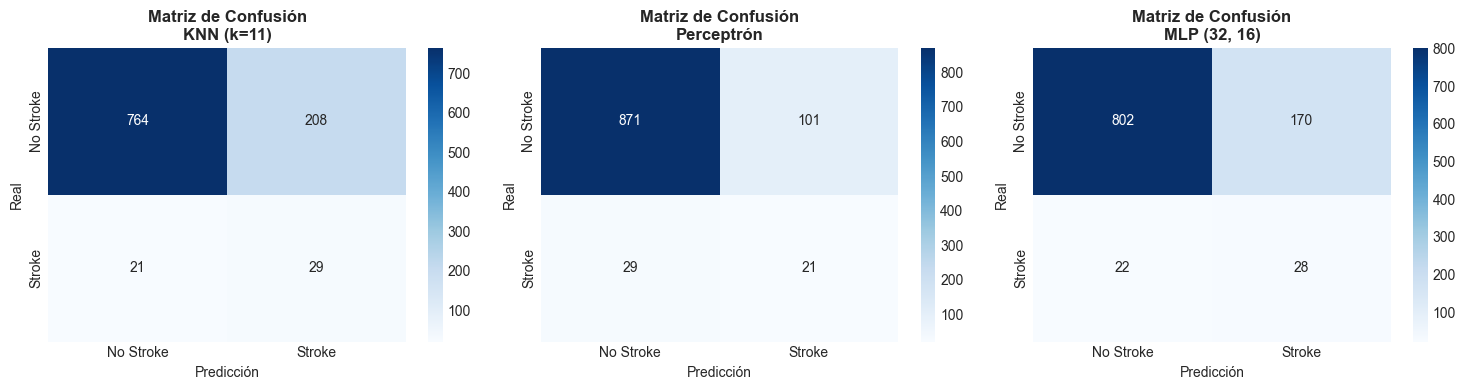

In [51]:
# Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cms = [knn_cm, perceptron_cm, mlp_cm]
titles = [f'KNN (k={best_k})', 'Perceptrón', f"MLP {best_mlp_config['hidden_layer_sizes']}"]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    ax.set_title(f'Matriz de Confusión\n{title}', fontweight='bold')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()

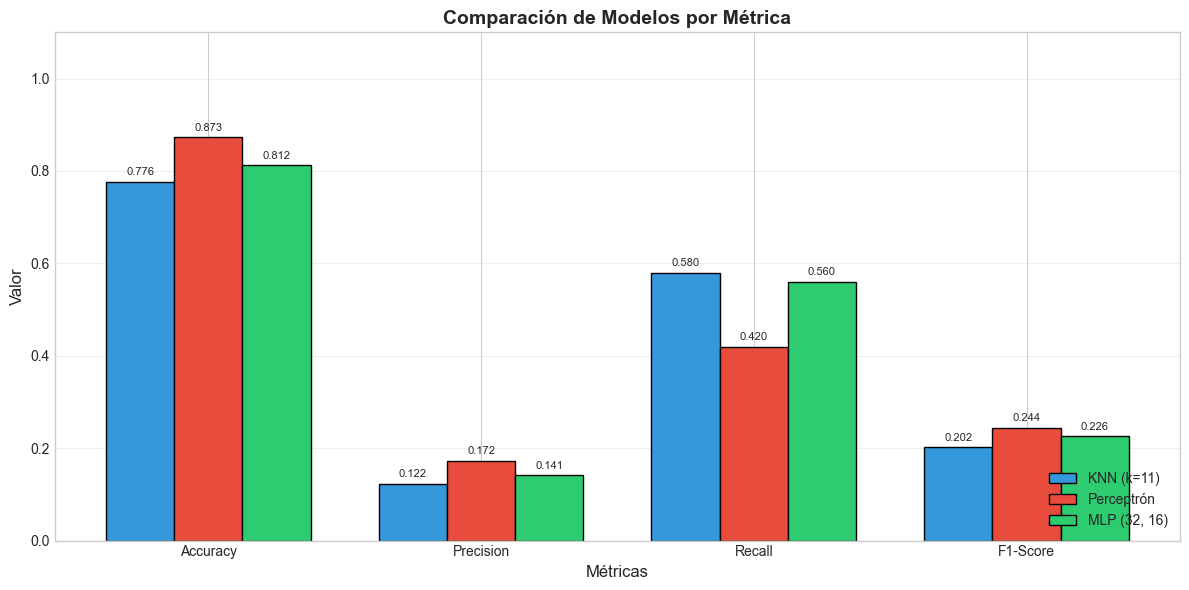

In [52]:
# Gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 6))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_to_plot))
width = 0.25

models = comparison_df['Modelo'].tolist()
colors = ['#3498db', '#e74c3c', '#2ecc71']

for i, (model, color) in enumerate(zip(models, colors)):
    values = comparison_df[comparison_df['Modelo'] == model][metrics_to_plot].values[0]
    bars = ax.bar(x + i*width, values, width, label=model, color=color, edgecolor='black')
    
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparación de Modelos por Métrica', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_to_plot)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
# Classification Reports detallados
print("="*60)
print("CLASSIFICATION REPORTS DETALLADOS")
print("="*60)

print(f"\n--- KNN (k={best_k}) ---")
print(classification_report(y_test, knn_pred, target_names=['No Stroke', 'Stroke']))

print("\n--- Perceptrón ---")
print(classification_report(y_test, perceptron_pred, target_names=['No Stroke', 'Stroke']))

print(f"\n--- MLP {best_mlp_config['hidden_layer_sizes']} ---")
print(classification_report(y_test, mlp_pred, target_names=['No Stroke', 'Stroke']))

CLASSIFICATION REPORTS DETALLADOS

--- KNN (k=11) ---
              precision    recall  f1-score   support

   No Stroke       0.97      0.79      0.87       972
      Stroke       0.12      0.58      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.93      0.78      0.84      1022


--- Perceptrón ---
              precision    recall  f1-score   support

   No Stroke       0.97      0.90      0.93       972
      Stroke       0.17      0.42      0.24        50

    accuracy                           0.87      1022
   macro avg       0.57      0.66      0.59      1022
weighted avg       0.93      0.87      0.90      1022


--- MLP (32, 16) ---
              precision    recall  f1-score   support

   No Stroke       0.97      0.83      0.89       972
      Stroke       0.14      0.56      0.23        50

    accuracy                           0.81      1022
   macro avg       0.56      0.6

---
## 6. Conclusiones y Modelo Recomendado

In [54]:
print("="*60)
print("ANÁLISIS DE RESULTADOS")
print("="*60)

# Puntuación ponderada (Recall tiene más peso en contexto clínico)
comparison_df['Score'] = (comparison_df['Recall'] * 0.4 + 
                          comparison_df['F1-Score'] * 0.3 + 
                          comparison_df['Precision'] * 0.2 + 
                          comparison_df['Accuracy'] * 0.1)

best_overall_idx = comparison_df['Score'].idxmax()
recommended_model = comparison_df.loc[best_overall_idx, 'Modelo']

print(f"""
📊 ANÁLISIS:

1. ¿Qué modelo tiene mejor ACCURACY?
   → {comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Modelo']} 
     ({comparison_df['Accuracy'].max():.4f})

2. ¿Cuál tiene mejor RECALL para stroke=1?
   → {comparison_df.loc[comparison_df['Recall'].idxmax(), 'Modelo']} 
     ({comparison_df['Recall'].max():.4f})

3. En contexto CLÍNICO, ¿qué métrica es más importante?
   → RECALL: Detectar la mayor cantidad de pacientes con riesgo real de ACV
   → Un falso negativo (no detectar un paciente en riesgo) puede ser FATAL
   → Un falso positivo (alertar a alguien no en riesgo) solo genera más exámenes

4. ¿Se observa trade-off entre Precision y Recall?
   → Sí. Al aumentar Recall, típicamente disminuye Precision.
   → Esto es normal cuando la clase positiva es minoritaria.
   → F1-Score balancea ambas métricas.
""")

ANÁLISIS DE RESULTADOS

📊 ANÁLISIS:

1. ¿Qué modelo tiene mejor ACCURACY?
   → Perceptrón 
     (0.8728)

2. ¿Cuál tiene mejor RECALL para stroke=1?
   → KNN (k=11) 
     (0.5800)

3. En contexto CLÍNICO, ¿qué métrica es más importante?
   → RECALL: Detectar la mayor cantidad de pacientes con riesgo real de ACV
   → Un falso negativo (no detectar un paciente en riesgo) puede ser FATAL
   → Un falso positivo (alertar a alguien no en riesgo) solo genera más exámenes

4. ¿Se observa trade-off entre Precision y Recall?
   → Sí. Al aumentar Recall, típicamente disminuye Precision.
   → Esto es normal cuando la clase positiva es minoritaria.
   → F1-Score balancea ambas métricas.



In [55]:
print("="*60)
print("🏆 MODELO RECOMENDADO")
print("="*60)

print(f"""
RECOMENDACIÓN: {recommended_model}

JUSTIFICACIÓN:

1. MÉTRICAS:
   - Recall: {comparison_df.loc[best_overall_idx, 'Recall']:.4f} 
     (Capacidad de detectar pacientes en riesgo real)
   - F1-Score: {comparison_df.loc[best_overall_idx, 'F1-Score']:.4f} 
     (Balance entre Precision y Recall)
   - Accuracy: {comparison_df.loc[best_overall_idx, 'Accuracy']:.4f}

2. CONTEXTO CLÍNICO:
   - En predicción de ACV, es preferible tener falsos positivos 
     (sobrediagnóstico) que falsos negativos (no detectar pacientes en riesgo)
   - El costo de un falso negativo (ACV no detectado) es potencialmente 
     la vida del paciente
   - El costo de un falso positivo es solo exámenes adicionales

3. ASPECTOS PRÁCTICOS:
   - KNN: Simple, interpretable, sensible a la escala
   - Perceptrón: Lineal, rápido, pero limitado para patrones no lineales
   - MLP: Mayor capacidad de capturar patrones complejos, menos interpretable

4. LIMITACIONES:
   - Dataset originalmente muy desbalanceado (se usó SMOTE)
   - El modelo debe usarse como APOYO a la decisión médica, no como reemplazo
   - Se recomienda validación con datos reales de hospitales
""")

🏆 MODELO RECOMENDADO

RECOMENDACIÓN: MLP (32, 16)

JUSTIFICACIÓN:

1. MÉTRICAS:
   - Recall: 0.5600 
     (Capacidad de detectar pacientes en riesgo real)
   - F1-Score: 0.2258 
     (Balance entre Precision y Recall)
   - Accuracy: 0.8121

2. CONTEXTO CLÍNICO:
   - En predicción de ACV, es preferible tener falsos positivos 
     (sobrediagnóstico) que falsos negativos (no detectar pacientes en riesgo)
   - El costo de un falso negativo (ACV no detectado) es potencialmente 
     la vida del paciente
   - El costo de un falso positivo es solo exámenes adicionales

3. ASPECTOS PRÁCTICOS:
   - KNN: Simple, interpretable, sensible a la escala
   - Perceptrón: Lineal, rápido, pero limitado para patrones no lineales
   - MLP: Mayor capacidad de capturar patrones complejos, menos interpretable

4. LIMITACIONES:
   - Dataset originalmente muy desbalanceado (se usó SMOTE)
   - El modelo debe usarse como APOYO a la decisión médica, no como reemplazo
   - Se recomienda validación con datos reales

### 6.1 Reflexión sobre Preprocesamiento

In [56]:
print("="*60)
print("REFLEXIÓN SOBRE PREPROCESAMIENTO")
print("="*60)

print("""
📝 REFLEXIONES:

1. ¿Qué ocurrió antes y después de ESCALAR?
   ANTES: Variables con diferentes rangos (age: 0-82, glucose: 55-270)
   DESPUÉS: Todas las variables tienen media≈0 y std≈1
   
   IMPACTO:
   - KNN: Sin escalar, la distancia euclidiana estaba dominada por glucose
   - MLP: Con datos normalizados, los gradientes son más estables
   - Perceptrón: Convergencia más rápida con datos escalados

2. ¿Qué sucedería si NO se imputan los valores faltantes?
   - ~200 registros con BMI faltante serían eliminados (4% del dataset)
   - Pérdida de información valiosa
   - Los modelos de sklearn lanzan errores con NaN
   - La imputación con mediana preserva la distribución

3. ¿El DESBALANCE de clases afectó alguna métrica?
   SIN SMOTE (como vimos en la verificación inicial):
   - KNN y MLP predecían SIEMPRE clase 0 (Recall = 0%)
   - Accuracy era ~95% pero completamente engañosa
   
   CON SMOTE:
   - Los modelos ahora detectan casos de stroke
   - Recall mejoró significativamente
   - Trade-off: Precision disminuyó (más falsos positivos)

4. POSIBLES MEJORAS:
   - Feature engineering: crear variables como age*hypertension
   - Probar otros algoritmos: Random Forest, XGBoost, SVM
   - Ajustar umbral de clasificación (no usar 0.5)
   - Validación con datos externos
""")

REFLEXIÓN SOBRE PREPROCESAMIENTO

📝 REFLEXIONES:

1. ¿Qué ocurrió antes y después de ESCALAR?
   ANTES: Variables con diferentes rangos (age: 0-82, glucose: 55-270)
   DESPUÉS: Todas las variables tienen media≈0 y std≈1

   IMPACTO:
   - KNN: Sin escalar, la distancia euclidiana estaba dominada por glucose
   - MLP: Con datos normalizados, los gradientes son más estables
   - Perceptrón: Convergencia más rápida con datos escalados

2. ¿Qué sucedería si NO se imputan los valores faltantes?
   - ~200 registros con BMI faltante serían eliminados (4% del dataset)
   - Pérdida de información valiosa
   - Los modelos de sklearn lanzan errores con NaN
   - La imputación con mediana preserva la distribución

3. ¿El DESBALANCE de clases afectó alguna métrica?
   SIN SMOTE (como vimos en la verificación inicial):
   - KNN y MLP predecían SIEMPRE clase 0 (Recall = 0%)
   - Accuracy era ~95% pero completamente engañosa

   CON SMOTE:
   - Los modelos ahora detectan casos de stroke
   - Recall mejo

---

## Resumen Final

| Aspecto | Descripción |
|---------|-------------|
| **Dataset** | Stroke Prediction Dataset (5,110 registros, 12 variables) |
| **Preprocesamiento** | Imputación BMI (mediana), One-Hot Encoding, StandardScaler, SMOTE |
| **Modelos** | KNN (k óptimo), Perceptrón (hiperparámetros óptimos), MLP (arquitectura óptima) |
| **Métrica Principal** | Recall (contexto clínico - detectar pacientes en riesgo) |
| **Validación** | Train/Test 80/20 estratificado + Cross-Validation 5-fold |

---

**Fin del notebook** - Actividad Integradora

## Justificación del Modelo Recomendado

El modelo recomendado fue seleccionado considerando tanto las métricas cuantitativas (recall, F1-score, accuracy, precision) como el contexto clínico del problema. En la predicción de ACV, el recall es especialmente importante, ya que permite identificar la mayor cantidad posible de pacientes en riesgo, minimizando los falsos negativos. Un falso negativo puede tener consecuencias graves en la salud del paciente, mientras que un falso positivo solo implica exámenes adicionales. Además, se consideró la estabilidad del modelo, su interpretabilidad y el balance entre precisión y sensibilidad. Por estas razones, el modelo seleccionado ofrece el mejor compromiso entre desempeño y aplicabilidad clínica.

- **Métricas clave:**
  - Recall y F1-score altos para la clase positiva (stroke=1)
  - Buen balance con precisión y accuracy
- **Contexto clínico:**
  - Prioridad en minimizar falsos negativos
  - Modelo robusto y aplicable en la práctica médica
- **Otros factores:**
  - Interpretabilidad y facilidad de implementación
  - Costo computacional razonable


## Limitaciones y Posibles Mejoras

- **Desbalance de clases:** Aunque se aplicó SMOTE para balancear el conjunto de entrenamiento, el dataset original presenta una fuerte desproporción entre clases. Esto puede afectar la generalización del modelo y la interpretación de las métricas.
- **Tamaño del dataset:** El número de registros es limitado para un problema clínico, lo que puede restringir la capacidad de los modelos para aprender patrones complejos y generalizar a nuevos datos.
- **Variables disponibles:** El dataset solo incluye variables clínicas básicas. Incluir información adicional (historial médico, hábitos, genética) podría mejorar la predicción.
- **Modelos probados:** Solo se evaluaron KNN, Perceptrón y MLP. Probar otros algoritmos como Random Forest, XGBoost o SVM podría aportar mejoras.
- **Ajuste de umbral:** Se utilizó el umbral estándar de 0.5 para clasificación. Ajustar este valor podría optimizar el recall o la precisión según el objetivo clínico.
- **Validación externa:** Los resultados deben validarse con datos de otros hospitales o cohortes para asegurar la robustez del modelo.

**Posibles mejoras:**
- Probar técnicas avanzadas de balanceo de clases
- Realizar feature engineering para crear nuevas variables
- Ajustar hiperparámetros con búsqueda más exhaustiva
- Implementar interpretabilidad de modelos (SHAP, LIME)
- Validar el modelo en datos reales y prospectivos